### Computer Vision Task: 3

#### 1.Choose any two image segmentation techniques and implement it using Python and a library like OpenCV. You can use a sample image or dataset available online. 
#### a.Explain the steps involved in the implementation. (3 points)
#### b.Include the code with comments to clarify each step. (5 points)
#### c.Present the input image and the segmented output image. (2 points)

## Image segmentation – plan

Implement two techniques:
1. **Otsu’s thresholding (grayscale, intensity-based):**
   - Convert to grayscale
   - Compute optimal threshold (Otsu)
   - Produce binary mask (foreground/background)

2. **K-means clustering (color, region-based):**
   - Reshape pixels to a 2D array
   - Cluster into K groups by color
   - Map pixels to cluster centers to form segmented image

Procedure:
- Load one sample image
- Apply Otsu’s thresholding
- Apply K-means clustering
- Display input and outputs
- Write a brief analysis of steps and observations


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image loaded successfully. Shape: (645, 860, 3)


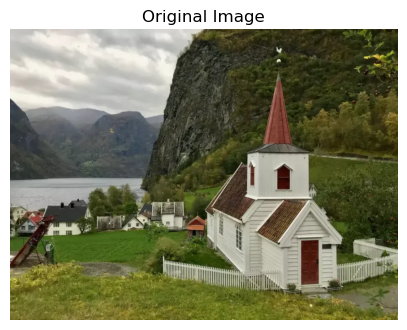

In [9]:
def show(img, title="", cmap=None, size=(5, 5)):
    plt.figure(figsize=size)
    if cmap is None and len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap if cmap else "gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

#Load image
img = cv2.imread("/Users/santhoshkumarg/Downloads/Python_Training/Church.webp")

# Check if image loaded 
if img is None:
    print("Image failed to load. Please check the path.")
else:
    print(f"Image loaded successfully. Shape: {img.shape}")
    show(img, title="Original Image")

#### 1. Otsu's Thresholding

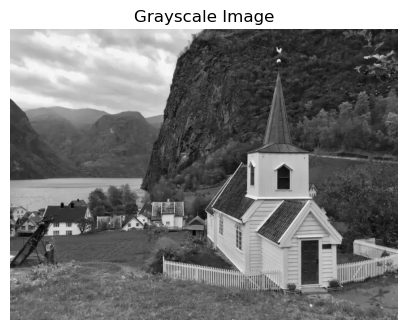

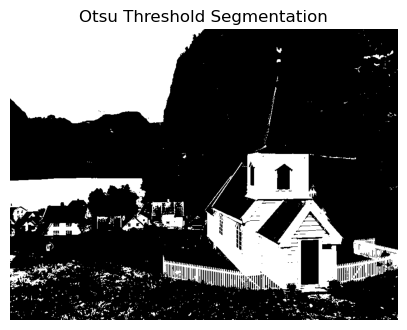

In [17]:
#Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply Otsu's thresholding
#THRESH_BINARY + THRESH_OTSU automatically finds the optimal threshold
_, otsu_segment = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Result
show(gray, title="Grayscale Image", cmap="gray")
show(otsu_segment, title="Otsu Threshold Segmentation", cmap="gray")


#### 2. K-means Clustering

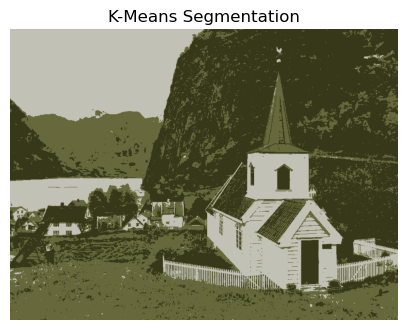

In [24]:
#Reshape image into 2D array of pixels
z = img.reshape((-1, 3))
z = np.float32(z)

#Defining creteria & apply K-means
criteria = (
    cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0
)

#No.of clusters
K = 3
_, labels, centers = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#Convert back to uint8 and reshape to original image
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((img.shape))

#Display results
show(segmented_image, title="K-Means Segmentation")

## Analysis of Segmentation Techniques

### 1. Otsu’s Thresholding
- **Steps**: Converted image to grayscale → applied Otsu’s method → produced binary mask.
- **Strengths**: Simple, fast, and effective when there is a clear intensity difference between foreground and background.
- **Limitations**: Only works on grayscale intensity; struggles with complex color images or overlapping intensity ranges.
- **Observation**: The output is a clean binary segmentation, separating bright and dark regions.

### 2. K-means Clustering
- **Steps**: Reshaped image pixels → applied K-means clustering → reconstructed segmented image from cluster centers.
- **Strengths**: Groups pixels by color similarity, effective for multi-colored or textured images.
- **Limitations**: Requires choosing the number of clusters (`K`); computationally heavier than thresholding; may produce different results depending on initialization.
- **Observation**: The output shows distinct color regions, simplifying the image into clustered segments.

---

### **Conclusion**
- **Otsu’s Thresholding**: Best suited for simple, grayscale-based segmentation tasks.  
- **K-means Clustering**: More powerful for color-based segmentation, producing visually distinct regions.  
- Together, they demonstrate the difference between **intensity-based** and **color-based** segmentation approaches.
